# Homework assignment 1
- focus on MovieLens dataset (choose which one you prefer), https://grouplens.org/datasets/movielens/
- implement some variant of user-based or item-based KNN (describe in comments what variant it is, what pre-processing did you use etc.)
- evaluate its performance

## performance evaluation
- for selected users, remove a portion of their ratings - those are the ones, you want to predict by your algorithm
- focus on hit rate at top-50 candidates (how many recommended items were relevant), time to recommend and time to train
- select a reasonably small subset of users / movies / interactions (e.g., recommend only for 10 users based on 10% of data)
- play with dataset size and / or algorithm variant and report on observed changes
- draw some conclusions

### additional question: what ratings should be considered as an evidence of user's preference?

# Alternative assignment
- perform a thorough analysis of some of the datasets (not just the ML1M below) or compare more of the datasets
- suggest how the dataset can be improved

## Possible tasks
- What are the ratings distribution, per users / per items?
- When the ratings were obtained?
- What is the selection of movies? What about their Genres, some genre-based statistics, tags?
- What about the movie years? How old movies do we have here? When they were rated?
- Do we know anything usable about the users?
- Are there some other important dataset features we do not know? What is missing? Can we link the dataset to something else?


In [14]:
import numpy as np

In [4]:
import csv
with open('ratings.dat', 'r') as fp:
    reader = csv.reader(fp, delimiter=';', quotechar='"')
    data, dataDict, dataUID, dataOID, dataRating = [],[],[],[],[]
    for row in reader:
        data.append(row)
        dataDict.append({ (row[0], row[1]): row[2] })
        dataUID.append(row[0])
        dataOID.append(row[1])
        dataRating.append(row[2])

In [5]:
import pandas as pd
df = pd.DataFrame(data, columns=["UID","OID","rating","timestamp"])
df.head()

,UID,OID,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
df_reduced = df.sample(50000)

In [27]:
df["rating_int"] = df.rating.astype(int)

(array([ 56174., 107557., 261197., 348971., 226310.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

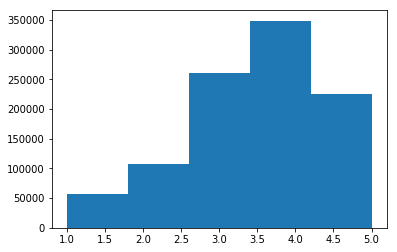

In [28]:
plt.hist(df.rating_int,5)

In [29]:
df["timestamp_float"] = df.timestamp.astype(np.float32)

(array([111500., 188785., 154169., 127206., 330430.,  19556.,   9240.,
          8710.,   7862.,   6477.,   4189.,   5467.,   5079.,   4460.,
          3060.,   3214.,   3180.,   2257.,   2587.,   2781.]),
 array([9.56703936e+08, 9.61191488e+08, 9.65678976e+08, 9.70166528e+08,
        9.74654080e+08, 9.79141632e+08, 9.83629120e+08, 9.88116672e+08,
        9.92604224e+08, 9.97091712e+08, 1.00157926e+09, 1.00606682e+09,
        1.01055430e+09, 1.01504186e+09, 1.01952941e+09, 1.02401690e+09,
        1.02850445e+09, 1.03299200e+09, 1.03747955e+09, 1.04196704e+09,
        1.04645459e+09], dtype=float32),
 <a list of 20 Patch objects>)

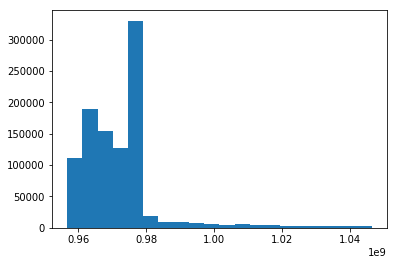

In [30]:
plt.hist(df.timestamp_float,20)

(array([ 39.,  63., 198., 325., 537., 864., 888., 627., 151.,  14.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

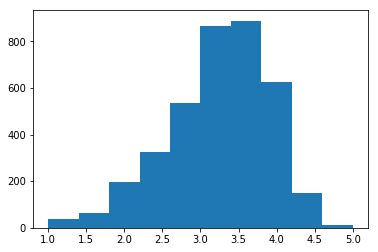

In [33]:
plt.hist(df.groupby(df.OID)["rating_int"].agg("mean"))

(array([   3.,    0.,   15.,   62.,  275.,  907., 2026., 2019.,  675.,
          58.]),
 array([1.01538462, 1.41014245, 1.80490028, 2.19965812, 2.59441595,
        2.98917379, 3.38393162, 3.77868946, 4.17344729, 4.56820513,
        4.96296296]),
 <a list of 10 Patch objects>)

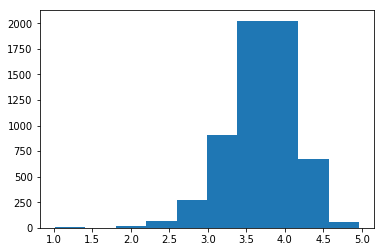

In [34]:
plt.hist(df.groupby(df.UID)["rating_int"].agg("mean"))

In [35]:

movies = pd.read_csv("movies.dat", sep=";", header=None, encoding='windows-1250')

In [36]:
movies.columns = ['OID', 'name', 'genre']
movies.head()

,OID,name,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [37]:
df.OID = pd.to_numeric(df.OID)
type(df.OID[0])

numpy.int64

In [41]:
movies["year"] = movies.name.str.extract(r'\(([0-9]+)\)')

In [47]:
movies["year_int"] = movies.year.astype("int")
movies.year_int.dtype

dtype('int32')

(array([  31.,   47.,   89.,   99.,  142.,  151.,  182.,  274.,  566.,
        2302.]),
 array([1919. , 1927.1, 1935.2, 1943.3, 1951.4, 1959.5, 1967.6, 1975.7,
        1983.8, 1991.9, 2000. ]),
 <a list of 10 Patch objects>)

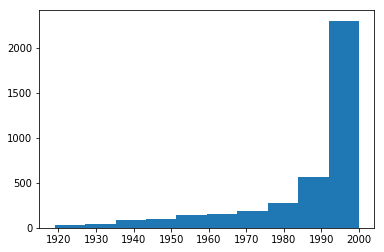

In [48]:
plt.hist(movies.year_int)

In [49]:
movies["year_bin"] = movies.year_int // 10

In [50]:
df = df.merge(movies, on="OID")
df.head()

,UID,OID,rating,timestamp,rating_int,timestamp_float,name,genre,year,year_int,year_bin
0,1,1193,5,978300760,5,978300736.0,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1975,197
1,2,1193,5,978298413,5,978298432.0,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1975,197
2,12,1193,4,978220179,4,978220160.0,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1975,197
3,15,1193,4,978199279,4,978199296.0,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1975,197
4,17,1193,5,978158471,5,978158464.0,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1975,197


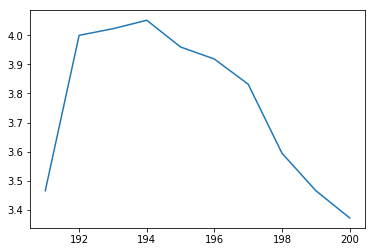

In [51]:
plt.plot(df.groupby(df.year_bin)["rating_int"].agg("mean"))

In [53]:
currUser = "100"

In [54]:
dataCurrUser = df[df.UID == "100"]

In [55]:
dataCurrUser.sort_values(by='rating', ascending=False)

,UID,OID,rating,timestamp,rating_int,timestamp_float,name,genre,year,year_int,year_bin
25888,100,527,5,977594839,5,977594816.0,Schindler's List (1993),Drama|War,1993,1993,199
11067,100,919,5,977594947,5,977594944.0,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical,1939,1939,193
249744,100,800,5,977593915,5,977593920.0,Lone Star (1996),Drama|Mystery,1996,1996,199
5937,100,1197,4,977594079,4,977594048.0,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,1987,1987,198
515919,100,969,4,977594044,4,977594048.0,"African Queen, The (1951)",Action|Adventure|Romance|War,1951,1951,195
192430,100,1291,4,977594008,4,977593984.0,Indiana Jones and the Last Crusade (1989),Action|Adventure,1989,1989,198
173294,100,318,4,977594839,4,977594816.0,"Shawshank Redemption, The (1994)",Drama,1994,1994,199
459177,100,329,4,977594297,4,977594304.0,Star Trek: Generations (1994),Action|Adventure|Sci-Fi,1994,1994,199
153562,100,21,4,977594079,4,977594048.0,Get Shorty (1995),Action|Comedy|Drama,1995,1995,199
149475,100,1954,4,977594113,4,977594112.0,Rocky (1976),Action|Drama,1976,1976,197


In [85]:
currUserIdx = dataUID.index(currUser) #may rise not found exception
print (currUserIdx) #returns only first occurence!!

currUserIdx = [i for i,x in enumerate(dataUID) if x == currUser]


currOIDs = [int(dataOID[i]) for i in currUserIdx ]
currRatings = [dataRating[i] for i in currUserIdx]

#divide known ratings into train set and test set
#learn the model based on train set and evaluate it based on test set
testSetOIDs = currOIDs[-50:]
testSetRatings = currRatings[-50:]

trainSetOIDs = currOIDs[0:-49] #use this to calculate predictions
trainSetRatings = currRatings[0:-49]

12900


In [60]:
df.head()

,UID,OID,rating,timestamp,rating_int,timestamp_float,name,genre,year,year_int,year_bin
0,1,1193,5,978300760,5,978300736.0,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1975,197
1,2,1193,5,978298413,5,978298432.0,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1975,197
2,12,1193,4,978220179,4,978220160.0,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1975,197
3,15,1193,4,978199279,4,978199296.0,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1975,197
4,17,1193,5,978158471,5,978158464.0,One Flew Over the Cuckoo's Nest (1975),Drama,1975,1975,197


In [86]:
uniqueUsers = df.UID.unique()

In [87]:
itemsets = df.groupby("UID").agg({
    "OID": lambda x: set(x)
})

In [88]:
itemsets.OID[currUser] = set(trainSetOIDs)

In [89]:
# a and b are sets
def jaccard_sim(a,b):
    return len(a.intersection(b))/len(a.union(b))

In [91]:
userSim = []
for i in itemsets.index:
    userSim.append(jaccard_sim(itemsets.OID[currUser], itemsets.OID[i]))
itemsets["sim100"] = userSim
itemsets.head()
#userSim[0:10]

,OID,sim100
UID,,
1,"{1, 2692, 260, 1028, 1287, 1029, 1545, 1035, 5...",0.025641
10,"{1, 2, 2049, 2054, 7, 2067, 24, 2072, 2077, 20...",0.046455
100,"{1408, 648, 1544, 1291, 780, 919, 1562, 924, 8...",1.000000
1000,"{1, 1029, 2571, 1036, 527, 2080, 2081, 2085, 2...",0.077670
1001,"{1, 2058, 2062, 59, 73, 2125, 2126, 112, 2165,...",0.010000


In [92]:
itemsets.sort_values("sim100",inplace=True, ascending=False)
itemsets.head()

,OID,sim100
UID,,
100,"{1408, 648, 1544, 1291, 780, 919, 1562, 924, 8...",1.000000
2291,"{3201, 260, 1797, 648, 912, 919, 153, 1562, 15...",0.214286
762,"{2947, 260, 2948, 2054, 2949, 1544, 3715, 10, ...",0.196721
4020,"{2, 517, 1544, 2571, 1036, 3598, 3107, 1580, 4...",0.168421
4202,"{1291, 910, 3479, 2968, 3104, 1193, 2987, 1196...",0.162791


In [95]:
k = 5
itemsets = itemsets.iloc[1:k]

In [99]:
res = set()
for i in itemsets.OID:
    res = res.union(i)
len(res)

148

In [101]:
predictedOIDs = list(res)

In [102]:
#evaluate results
def intersect(a, b):
    return list(set(a) & set(b))

In [103]:
#all rated objects
print( len(intersect(predictedOIDs, testSetOIDs) ))

23


In [104]:
#objects rated 4* or 5*
posTestRatingIdx = [i for i,x in enumerate(testSetRatings) if int(x) >= 4]
posTestOIDs = [testSetOIDs[i] for i in posTestRatingIdx ]
print( len(intersect(predictedOIDs, posTestOIDs) ))

6


In [105]:
print( len( posTestOIDs) )

10


In [106]:
print( len( testSetOIDs) )

50
